<h1>Averaged Perceptron</h1>
The Perceptron is an interesting algorithm that lets us classify data by seperating labeled data with a hyperplane (in low dimensions this is just a 2D line or a 3D plane). You've also seen how to implement your own Perceptron in code to classify flowers based off of some measured "features" (also known as "handcrafted" features). As you may have noticed, the Perceptron struggels to converge with this data and tends to occilate. A more stable version of the algorithm is the "Averaged" Perceptron, which creates a weighted average of the calculated weights based off of how many correct predictions a vector of weights gets in a row. 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

We will use the Iris flower dataset, which happens to be one of the first datasets created for statistical analysis. The Iris dataset contains 150 examples of Iris flowers belonging to 3 species *Iris-setosa*, *Iris-versicolor* and, *Iris-virginica*. Each example has 4 features *sepal length*, *sepal width*, *petal length*, and *petal width*. See the image below for an illustration.


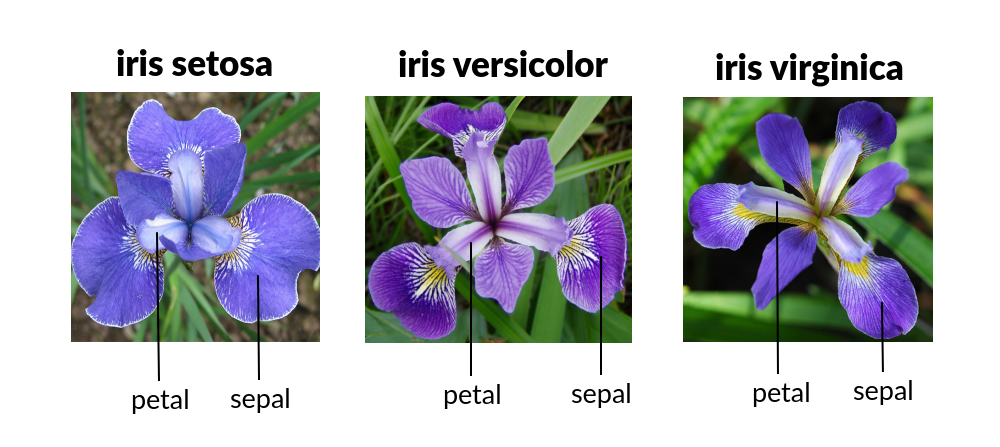


Below, we use the Pandas package to download and read the dataset first. 

In [ ]:
#Download url
URL_='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
#Use URL to create a Pandas dataframe
data = pd.read_csv(URL_, header = None)
data

So, the data of the **first** 5 examples looks as follows:

| exmaple# | sepal length (cm) | sepal width (cm) | petal length (cm) | petal width (cm) | target | target name|
| --- | --- | --- || --- | --- | --- |
| 0 | 5.1 | 3.5 | 1.4 |  0.2| 0|  setosa
| 1 |4.9|  3. |  1.4|  0.2|0|  setosa
| 2 |4.7|  3.2|  1.3|  0.2|0|  setosa
| 3 |4.6|  3.1|  1.5|  0.2|0|  setosa
| 4 |5. |  3.6|  1.4|  0.2|0|  setosa


We consider the Iris-setosa as positive class and Iris-versicolor as negative (they are the entries from 1-100 but remember in Python arrays start from index 0). For visulization purposes, we will use the first two features (*i.e.*, sepal length, sepal width) in our experiments.

In [ ]:
#There are 50 setosa and 50 versicolor and 50 virginica, we are just using setosa and versicolor 
#make the dataset linearly separable
#aka convert the target names to -1 or 1 so we can train with it
data[4] = np.where(data.iloc[:, -1]=='Iris-setosa', 1, -1)

#Convert Pandas dataframe to a Numpy array
np_data = np.asarray(data, dtype = 'float64')

#We will train the Perceptron using the first two attribute sepal length and sepal width
x_train = np_data[:100,:2]
#ouput is the target name which we converted into either 1 or -1
y_train = np_data[:100,-1] 

Before training the perceptron, let us visualize the data

In [ ]:
# scattter plot
scatter = plt.scatter(x_train[:, 0], x_train[:, 1], 
            s=200, c=np.squeeze((y_train+1)/2), 
            marker='x', cmap=mpl.colors.ListedColormap(["blue", "green"]))

plt.xlabel('sepal lenght', size=20)
plt.ylabel('sepal width', size=20)

plt.legend(scatter.legend_elements()[0], ['Iris-setosa', ' Iris-versicolor'])

<h2>Implementing the Perceptron</h2>

First, re-implement the vanilla Perceptron using weights w and bias b.<br>
After you have done this, update w_ave and b_ave as per the "Averaged Perceptron" algorithm<br>

In [ ]:
nSamples, dim = x_train.shape
max_iter = 10

#init our parameters to 0
w = np.zeros([1,dim])
b = np.zeros([1,1])

w_ave = np.zeros([1,dim])
b_ave = np.zeros([1,1])  

#We'll log the accuracy to plot later 
log_acc = []
log_acc_ave = []

#setting the random seed will generate the same sequence on every run, making it possible to reproduce randomization
np.random.seed(10) 
#Perform a number of iterations over the dataset
for cur_iter in range(max_iter):
    c = 1
    #create an array of random indices created at the start of every epoch
    rnd_idx = np.random.permutation(nSamples)
    for indx in rnd_idx:
        
        #Sample a single datapoint
        x_i = x_train[indx]
        y_i = y_train[indx]
        
        #Calculate the prediction
        y_hat = np.sign(np.dot(w,x_i) + b)
        
        #Only update the Perceptron if the prediction is incorrect
        if (not y_hat==y_i):
            #if prediction is not correct update the ave weights with the old weights
            #before updating the weights
            
            #Either way will work as the magnitude of the weights do not matter
            #as the weights represent the normal of the hyperplane
            #for large datasets with many datapoints averaging may be nessisary
            #to stop values from becoming too large
            
            #Weighted average
#             w_ave += (c/(nSamples))*w
#             b_ave += (c/(nSamples))*b

            #Weighted sum
            w_ave += c*w
            b_ave += c*b
            
            #Update the weights and bias
            w += y_i*x_i
            b += y_i
        
            #reset counter
            c = 1
        else:
            #if prediction is correct increment counter
            c += 1
                    
    #Calculate the output for every sample using the average weights a bias
    y_hat_X_ave = np.sign(np.matmul(x_train, w_ave.T) + b_ave) 
    #Compare to the real labels to calculate the accuracy
    acc_ave = (y_hat_X_ave.squeeze() == y_train.squeeze()).mean()
    log_acc_ave.append(acc_ave)
    
    #Calculate the output for every sample
    y_hat_X = np.sign(np.matmul(x_train, w.T) + b) 
    #Compare to the real labels to calculate the accuracy
    acc = (y_hat_X.squeeze() == y_train.squeeze()).mean()
    log_acc.append(acc)
    
    print("Iter{0}: accuracy: {1:.3f}, averaged accuracy: {2:.3f}".format(cur_iter+1, acc, acc_ave))  
    #Note: this is another way you can format print statements in python (there are many ways)
    #the ints 0,1,2 tell python which value from a list you want to print out
    #.3f is the datatype (f - float) and precision (.3 - 3 decimal points) just like matlab!

<h3>Results</h3>
As we can see (and you might have gussed) this dataset is not perfectly seperable, as a result the vanilla perceptron occilates back and forth. The Averaged Perceptron however manages to converge to the best possible solution.

In [ ]:
# scattter plot
scatter2 = plt.scatter(x_train[:, 0], x_train[:, 1], 
        s=200, c=np.squeeze((y_train+1)/2), 
        marker='o', cmap=mpl.colors.ListedColormap(["blue", "red"]))

scatter = plt.scatter(x_train[:, 0], x_train[:, 1], 
        s=200, c=np.squeeze((y_hat_X_ave+1)/2), 
        marker='x', cmap=mpl.colors.ListedColormap(["blue", "red"]))

plt.xlabel('sepal lenght', size=20)
plt.ylabel('sepal width', size=20)
plt.title('Predicted vs Ground Truth', size=20)

plt.legend(scatter.legend_elements()[0], ['Iris-setosa', ' Iris-versicolor'])

In [ ]:
plt.figure(figsize = (10, 5))
plt.plot(log_acc_ave)
plt.plot(log_acc)
plt.legend(["Average", "Vanilla"])

plt.xlabel('Iteration', size=20)
plt.ylabel('Accuracy', size=20)
plt.title("Average vs Vanilla Perceptron", size=30)
# plt.savefig("perceptron.png")